# iLab2

# Import Modules & Settings

In [1]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Get FilePath & Load File

In [3]:
path = os.path.abspath(os.getcwd())

coles_event = glob(path + '/Cleaned_all*.csv')
df = pd.read_csv(coles_event[0], sep = ',', dtype = {'actorId': str})

actorid_map = glob(path + '/actorid_dict.csv')
df_id = pd.read_csv(actorid_map[0], sep = ',')

timezone_map = glob(path + '/timezone_dict.csv')
df_tz = pd.read_csv(timezone_map[0], sep = ',')

# Data Exploration

In [4]:
df.head()

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response
0,0,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
1,1,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
2,2,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
3,3,completed,event,activities,['activities'],0,1.0,1.0,0,1,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
4,4,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39185082, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39185082 entries, 0 to 39185081
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   actorId         object 
 1   verb            object 
 2   type            object 
 3   activity        object 
 4   ancestors       object 
 5   duration        int64  
 6   completion      float64
 7   Is Manager      float64
 8   Is New Starter  int64  
 9   Time Zone       int64  
 10  timestamp       object 
 11  other           object 
 12  contained       object 
 13  rating          float64
 14  response        object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.4+ GB


In [7]:
df.describe()

,duration,completion,Is Manager,Is New Starter,Time Zone,rating
count,3.918508e+07,3.872175e+07,3.913585e+07,3.918508e+07,3.918508e+07,1.874656e+06
mean,1.372283e+04,2.971697e-01,2.598383e-01,1.565861e-02,2.431955e+00,4.631024e+00
std,6.274242e+04,4.570119e-01,4.385457e-01,1.241508e-01,1.567393e+00,8.437878e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
50%,8.840000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00
75%,7.258000e+03,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00
max,1.199992e+06,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,5.000000e+00


In [8]:
df['actorId'].nunique()

174734

In [9]:
df['Is Manager'].value_counts()

0.0    28966856
1.0    10168990
Name: Is Manager, dtype: int64

In [10]:
df['Is New Starter'].value_counts()

0    38571498
1      613584
Name: Is New Starter, dtype: int64

In [11]:
df['verb'].value_counts()

experienced     11957012
completed        9924934
initialized      5287525
viewed           3444075
searched         3300243
rated            1888639
passed           1000058
selected          512770
launched          444627
registered        408785
terminated        250355
suspended         216091
removed           190053
assigned          159325
unregistered       60961
failed             57198
remove             33947
shared             21978
updated            11671
earned              8519
complete            4923
scored              1027
attempted            319
reset                 46
update                 1
Name: verb, dtype: int64

In [12]:
df['type'].value_counts()

lesson             5046239
module             4026981
search-engine      3300165
course             1206473
video               854393
interaction         524519
alert               202684
resource             60206
page                 59506
program              18423
assessment           13749
event                13384
badge                 8519
session-series        2757
webpage               2017
event-series           518
voucher                320
article                271
cmi.interaction        194
event-session          106
leaderboard              2
Name: type, dtype: int64

In [13]:
df['activity'].value_counts()

activities                                                  12677920
learning                                                     5731487
home                                                         5292838
results                                                      3444075
search                                                       3300243
notifications                                                1387465
profile                                                      1250070
team                                                          882151
dashboard                                                     760124
tasks                                                         632689
explore                                                       532027
course_id                                                     486652
transcript                                                    364129
learningseat_course                                           305649
brand                             

# Data Cleansing

In [14]:
# replace 'complete' by 'completed'
df['verb'] = df['verb'].replace(to_replace = 'complete', value = 'completed')

# replace 'remove' by 'removed'
df['verb'] = df['verb'].replace(to_replace = 'remove', value = 'removed')

In [15]:
df['verb'].value_counts()

experienced     11957012
completed        9929857
initialized      5287525
viewed           3444075
searched         3300243
rated            1888639
passed           1000058
selected          512770
launched          444627
registered        408785
terminated        250355
removed           224000
suspended         216091
assigned          159325
unregistered       60961
failed             57198
shared             21978
updated            11671
earned              8519
scored              1027
attempted            319
reset                 46
update                 1
Name: verb, dtype: int64

In [16]:
df_staff = df[df['Is Manager'] == 0]
df_manager = df[df['Is Manager'] == 1]

# Staff Dataset

In [17]:
df_staff = df_staff.fillna('')

In [18]:
df_staff['combined'] = df_staff['verb'] + "|" + df_staff['type'] + "|" + df_staff['activity']

### Merge with verb-activity group (manual labelling)

In [19]:
verb_activity = glob(path + '/combined_verb_activity_mapping.xlsx')
df_va = pd.read_excel(verb_activity[0], dtype = {'social': bool, 'exploring': bool, 'learning': bool})

In [20]:
df_va.head()

,combined,verb,type,activity,counts,action,social,exploring,learning
0,assigned|course|activities,assigned,course,activities,,assigned_course,False,True,True
1,assigned|course|course_id,assigned,course,course_id,559,assigned_course,False,True,True
2,assigned|course|ScamAwareness14-05-2018,assigned,course,ScamAwareness14-05-2018,419,assigned_course,False,True,True
3,assigned|course|sustainability_recycling_Fresh...,assigned,course,sustainability_recycling_Fresh_Bites,88,assigned_course,False,True,True
4,assigned|course|bakery_Fresh_Bites,assigned,course,bakery_Fresh_Bites,22,assigned_course,False,True,True


In [21]:
df_staff_action = pd.merge(df_staff[['actorId', 'combined']], df_va[['combined', 'action', 'social', 'exploring', 'learning']], on = 'combined', how = 'left')

In [22]:
df_staff_action.head()

,actorId,combined,action,social,exploring,learning
0,10,completed|event|activities,completed_event,False,False,False
1,18,completed||activities,completed_activities,False,True,False
2,19,completed||6291,completed_course,False,False,True
3,21,initialized||home,initialized_home,False,False,False
4,21,experienced||learning,experienced_learning,False,True,True


### Validate & Select valid action

In [23]:
# verb count
vc = df_staff_action['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_filter = df_staff_action[df_staff_action['action'].isin(vc_list)]

### Pivot Dataset

In [24]:
df_sa_new = df_staff_action_filter
df_sa_new['occurence'] = 1

# generate pivot table
df_sa_pivot = pd.pivot_table(df_sa_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sa_pivot = df_sa_pivot.reset_index()

# remove index header
df_sa_pivot = df_sa_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sa_pivot = df_sa_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

C:\Users\lche5\AppData\Local\Temp\ipykernel_17536\4084279176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa_new['occurence'] = 1


In [25]:
df_sa_pivot.head()

,actorId,assigned_course,assigned_lesson,assigned_module,attempted_course,completed_activities,completed_assessment,completed_course,completed_event,completed_event-series,...,terminated_video,unregistered_activities,unregistered_course,unregistered_lesson,unregistered_module,unregistered_program,unregistered_video,unregistered_voucher,updated_interaction,viewed_results
0,10,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1,100,2.0,0.0,0.0,0.0,184.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,89.0
2,1000,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
3,10000,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
4,100000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


### Scale features

In [28]:
# generate dataframe without actorId
df_sa_noid = df_sa_pivot.loc[:, df_sa_pivot.columns != 'actorId']

# a) Standardisation: create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_sa_scaled1 = StandardScaler().fit_transform(df_sa_noid)

# b) Normalisation: range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_sa_scaled2 = pd.DataFrame(scaler.fit_transform(df_sa_noid), columns = df_sa_noid.columns)

### Find the Optimal Number of Clusters (elbow chart)

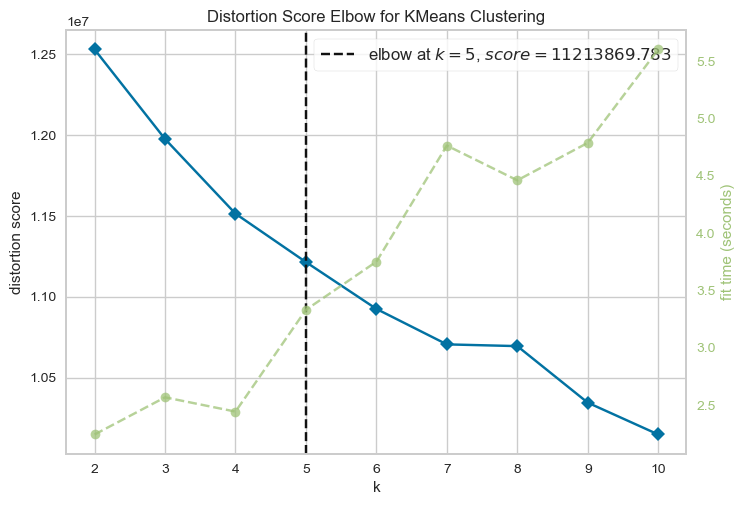

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state = 1)

elb_visualizer_sa1 = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sa1.fit(df_sa_scaled1)    
elb_visualizer_sa1.show()

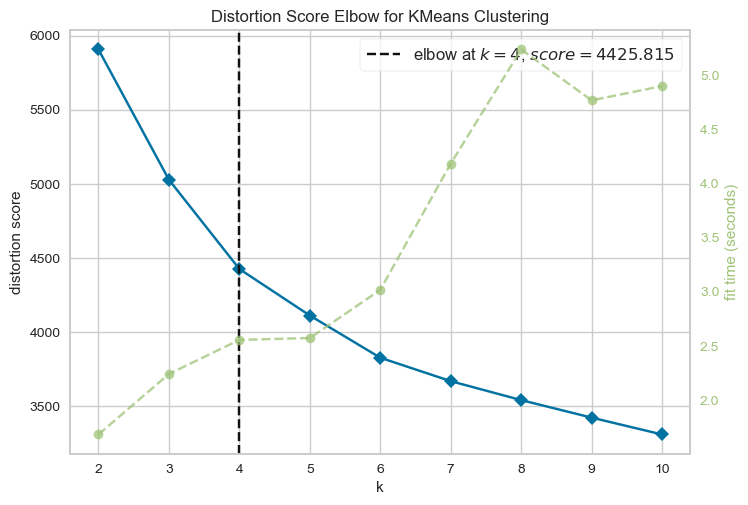

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state = 1)

elb_visualizer_sa2 = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sa2.fit(df_sa_scaled2)    
elb_visualizer_sa2.show()

### Find the Optimal Number of Clusters (Silhouette analysis)

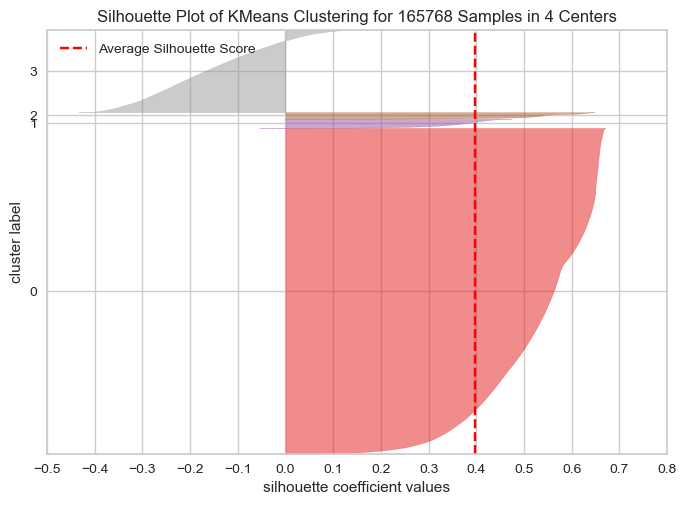

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165768 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model_4clust = KMeans(n_clusters = 4, random_state = 1)

sil_visualizer_sa3 = SilhouetteVisualizer(model_4clust)
sil_visualizer_sa3.fit(df_sa_scaled2)    
sil_visualizer_sa3.show()

### Perform K-Means Clustering with Optimal K

In [49]:
#append cluster assingments to original DataFrame
df_sa_cat = df_sa_pivot
df_sa_cat['cluster'] = sil_visualizer_sa3.labels_

In [50]:
df_sa_cat.head()

,actorId,assigned_course,assigned_lesson,assigned_module,attempted_course,completed_activities,completed_assessment,completed_course,completed_event,completed_event-series,...,unregistered_activities,unregistered_course,unregistered_lesson,unregistered_module,unregistered_program,unregistered_video,unregistered_voucher,updated_interaction,viewed_results,cluster
0,10,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0
1,100,2.0,0.0,0.0,0.0,184.0,0.0,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,89.0,3
2,1000,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0
3,10000,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0
4,100000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0


## 1) Social Group

C:\Users\lche5\AppData\Local\Temp\ipykernel_17536\2675755120.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sas_new['occurence'] = 1


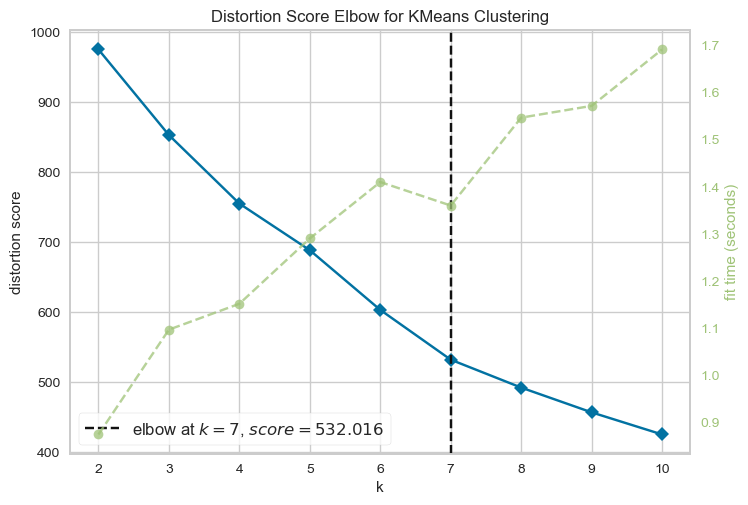

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# select social group
df_staff_action_social = df_staff_action[df_staff_action['social'] == True]

# verb count
vc = df_staff_action_social['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_social_filter = df_staff_action_social[df_staff_action_social['action'].isin(vc_list)]
df_sas_new = df_staff_action_social_filter
df_sas_new['occurence'] = 1

# generate pivot table
df_sas_pivot = pd.pivot_table(df_sas_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sas_pivot = df_sas_pivot.reset_index()

# remove index header
df_sas_pivot = df_sas_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sas_pivot = df_sas_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

# generate dataframe without actorId
df_sas_noid = df_sas_pivot.loc[:, df_sas_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sas_scaled = pd.DataFrame(scaler.fit_transform(df_sas_noid), columns = df_sas_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_sas_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sas_eb.fit(df_sas_scaled)    
elb_visualizer_sas_eb.show()

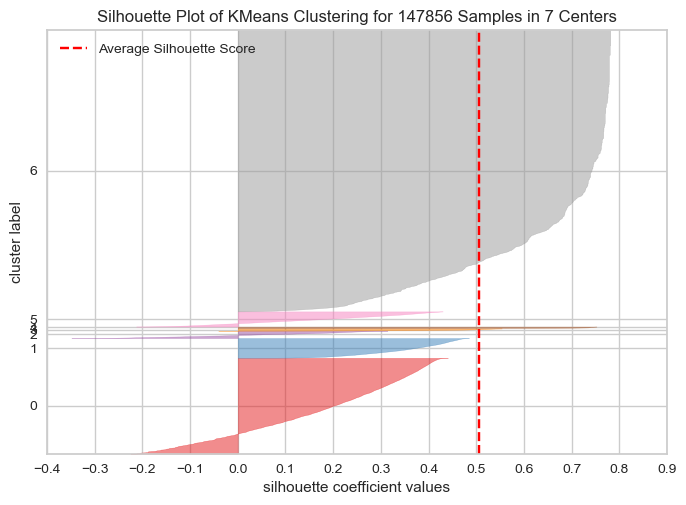

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 147856 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model_4clust = KMeans(n_clusters = 7, random_state = 1)

sil_visualizer_sas_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_sas_sh.fit(df_sas_scaled)    
sil_visualizer_sas_sh.show()

In [51]:
df_sas_cat = df_sas_pivot
df_sas_cat['cluster'] = sil_visualizer_sas_sh.labels_
df_sas_cat.head()

,actorId,experienced_profile,experienced_team,rated_article,rated_assessment,rated_course,rated_lesson,rated_module,rated_page,rated_program,rated_video,rated_webpage,scored_video,shared_activities,shared_course,shared_lesson,shared_module,updated_interaction,cluster
0,10,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,100,173.0,171.0,0.0,0.0,14.0,17.0,32.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,0.0,1.0,5
2,1000,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,10000,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,100000,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [54]:
df_sas_summary = df_sas_cat[['rated_lesson', 'experienced_profile', 'rated_course', 'rated_module', 'experienced_team', 'cluster']].groupby("cluster").mean().round()
df_sas_summary['count'] = df_sas_cat.groupby("cluster").size()
df_sas_summary

,rated_lesson,experienced_profile,rated_course,rated_module,experienced_team,count
cluster,,,,,,
0,11.0,5.0,4.0,4.0,1.0,33481
1,11.0,6.0,7.0,4.0,1.0,6901
2,39.0,14.0,33.0,14.0,5.0,2531
3,12.0,10.0,14.0,11.0,4.0,823
4,7.0,9.0,2.0,3.0,7.0,635
5,16.0,9.0,8.0,21.0,5.0,5289
6,2.0,4.0,1.0,1.0,1.0,98196


## 2) Exploring Group

C:\Users\lche5\AppData\Local\Temp\ipykernel_17536\1472877407.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sae_new['occurence'] = 1


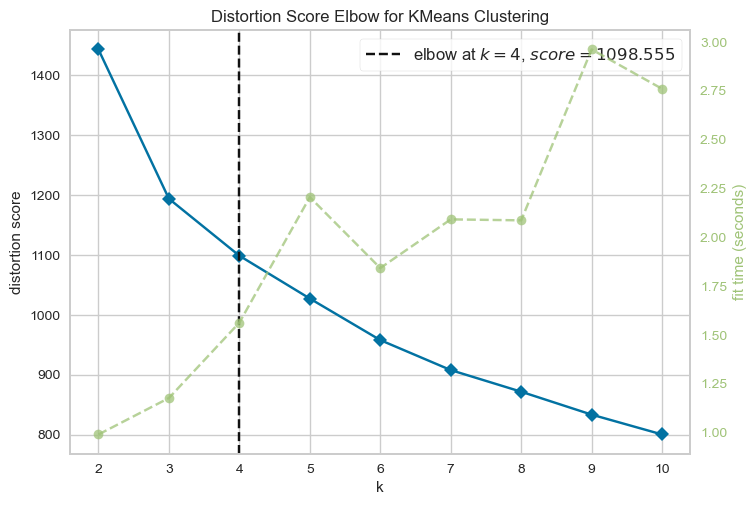

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
df_staff_action_exlore = df_staff_action[df_staff_action['exploring'] == True]

# verb count
vc = df_staff_action_exlore['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_exlore_filter = df_staff_action_exlore[df_staff_action_exlore['action'].isin(vc_list)]

df_sae_new = df_staff_action_exlore_filter
df_sae_new['occurence'] = 1

# generate pivot table
df_sae_pivot = pd.pivot_table(df_sae_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sae_pivot = df_sae_pivot.reset_index()

# remove index header
df_sae_pivot = df_sae_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sae_pivot = df_sae_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

# generate dataframe without actorId
df_sae_noid = df_sae_pivot.loc[:, df_sae_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sae_scaled = pd.DataFrame(scaler.fit_transform(df_sae_noid), columns = df_sae_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_sae_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sae_eb.fit(df_sae_scaled)
elb_visualizer_sae_eb.show()

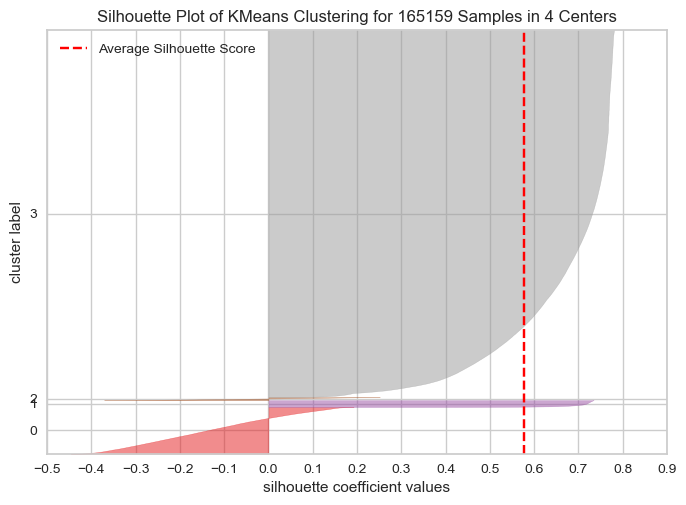

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165159 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
model_4clust = KMeans(n_clusters = 4, random_state = 1)

sil_visualizer_sae_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_sae_sh.fit(df_sae_scaled)    
sil_visualizer_sae_sh.show()

In [55]:
df_sae_cat = df_sae_pivot
df_sae_cat['cluster'] = sil_visualizer_sae_sh.labels_
df_sae_cat.head()

,actorId,assigned_course,assigned_lesson,assigned_module,attempted_course,completed_activities,completed_page,completed_webpage,earned_badge,experienced_activities,...,registered_lesson,registered_module,registered_program,registered_video,registered_voucher,searched_search-engine,selected_interaction,updated_interaction,viewed_results,cluster
0,10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,15.0,3
1,100,2.0,0.0,0.0,0.0,184.0,0.0,0.0,0.0,13.0,...,1.0,1.0,0.0,0.0,0.0,89.0,0.0,1.0,89.0,2
2,1000,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,46.0,5.0,0.0,48.0,3
3,10000,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,15.0,6.0,0.0,19.0,3
4,100000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3


In [56]:
df_sae_summary = df_sae_cat[['experienced_learning', 'viewed_results', 'searched_search-engine', 'completed_activities', 'experienced_notifications', 'cluster']].groupby("cluster").mean().round()
df_sae_summary['count'] = df_sae_cat.groupby("cluster").size()
df_sae_summary

,experienced_learning,viewed_results,searched_search-engine,completed_activities,experienced_notifications,count
cluster,,,,,,
0,61.0,75.0,72.0,16.0,11.0,18212
1,78.0,10.0,8.0,8.0,9.0,2639
2,151.0,122.0,117.0,126.0,34.0,1204
3,20.0,9.0,8.0,7.0,3.0,143104


In [77]:
# unpivot data
df_sae_unpivoted = df_sae_pivot.melt(id_vars = ['actorId'], var_name = 'action', value_name = 'count')

# break down action into verb & activity
df_sae_unpivoted[['verb', 'activity']] = df_sae_unpivoted['action'].str.split('_', expand = True)

# sum count by actorId & verb
df_sae_sum = df_sae_unpivoted[['actorId', 'verb', 'count']].groupby(['actorId', 'verb']).sum()
df_sae_sum = df_sae_new.reset_index()

# generate pivot table
df_sae_new_pivot = pd.pivot_table(df_sae_sum, values = 'count', index = 'actorId', columns = 'verb', aggfunc = 'sum')

# convert pivot table to dataframe
df_sae_new_pivot = df_sae_new_pivot.reset_index()

# remove index header
df_sae_new_pivot = df_sae_new_pivot.rename_axis(None, axis = 1)

df_sae_new_pivot.head()

,actorId,assigned,attempted,cluster,completed,earned,experienced,launched,registered,searched,selected,updated,viewed
0,10,0.0,0.0,3.0,2.0,0.0,47.0,9.0,3.0,15.0,0.0,0.0,15.0
1,100,2.0,0.0,2.0,184.0,0.0,975.0,8.0,6.0,89.0,0.0,1.0,89.0
2,1000,0.0,0.0,3.0,6.0,0.0,60.0,8.0,3.0,46.0,5.0,0.0,48.0
3,10000,0.0,0.0,3.0,5.0,0.0,19.0,0.0,3.0,15.0,6.0,0.0,19.0
4,100000,0.0,0.0,3.0,2.0,0.0,16.0,3.0,0.0,5.0,0.0,0.0,5.0


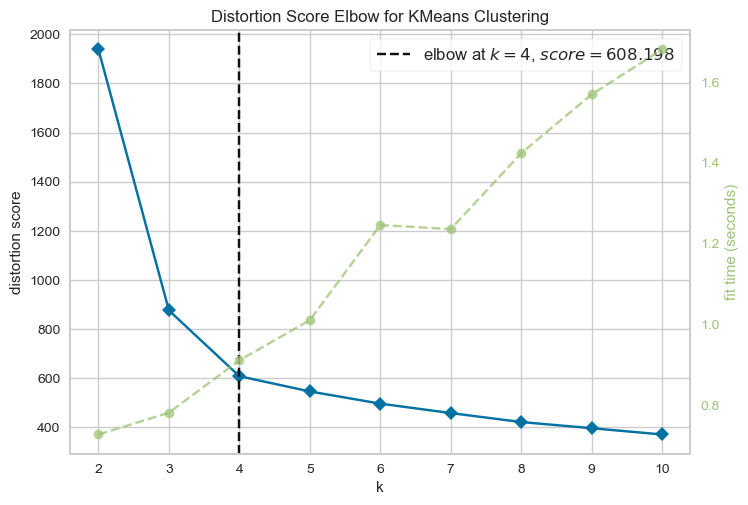

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# generate dataframe without actorId
df_sae_new_noid = df_sae_new_pivot.loc[:, df_sae_new_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sae_new_scaled = pd.DataFrame(scaler.fit_transform(df_sae_new_noid), columns = df_sae_new_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_saen_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_saen_eb.fit(df_sae_new_scaled)
elb_visualizer_saen_eb.show()

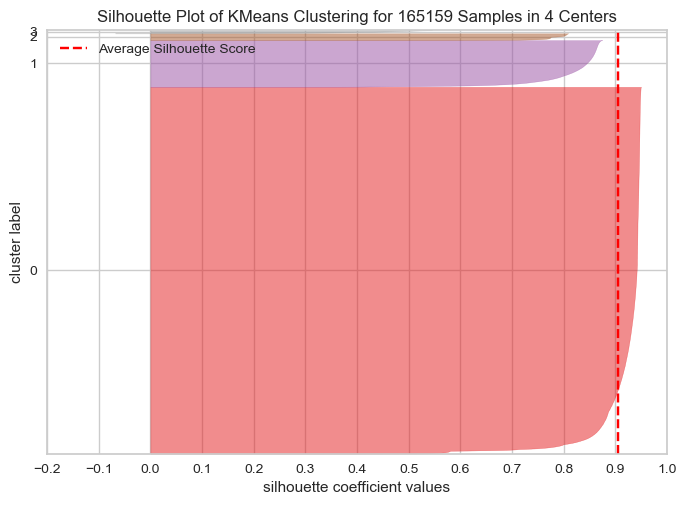

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165159 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
model_4clust = KMeans(n_clusters = 4, random_state = 1)

sil_visualizer_saen_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_saen_sh.fit(df_sae_new_scaled)
sil_visualizer_saen_sh.show()

## 3) Learning Group

C:\Users\lche5\AppData\Local\Temp\ipykernel_17536\1903177123.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sal_new['occurence'] = 1


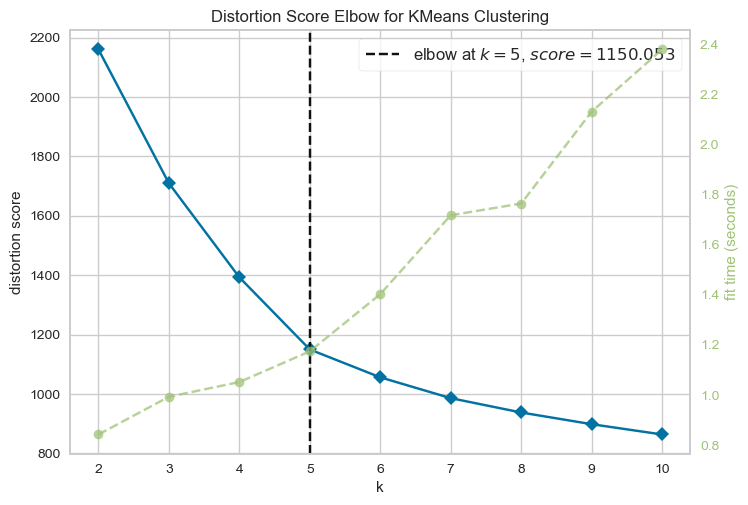

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
df_staff_action_learn = df_staff_action[df_staff_action['learning'] == True]

# verb count
vc = df_staff_action_learn['action'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_staff_action_learn_filter = df_staff_action_learn[df_staff_action_learn['action'].isin(vc_list)]

df_sal_new = df_staff_action_learn_filter
df_sal_new['occurence'] = 1

# generate pivot table
df_sal_pivot = pd.pivot_table(df_sal_new, values = 'occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_sal_pivot = df_sal_pivot.reset_index()

# remove index header
df_sal_pivot = df_sal_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_sal_pivot = df_sal_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

# generate dataframe without actorId
df_sal_noid = df_sal_pivot.loc[:, df_sal_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_sal_scaled = pd.DataFrame(scaler.fit_transform(df_sal_noid), columns = df_sal_noid.columns)

# plot elbow chart
model = KMeans(random_state = 1)

elb_visualizer_sal_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_sal_eb.fit(df_sal_scaled)
elb_visualizer_sal_eb.show()

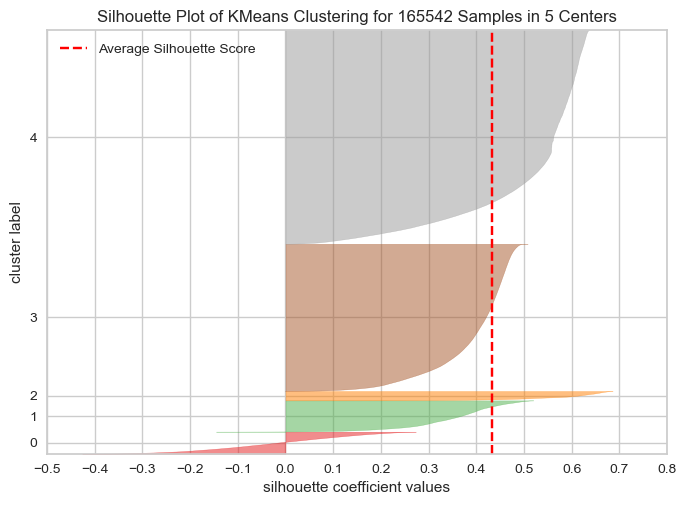

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 165542 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
model_4clust = KMeans(n_clusters = 5, random_state = 1)

sil_visualizer_sal_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_sal_sh.fit(df_sal_scaled)    
sil_visualizer_sal_sh.show()

In [59]:
df_sal_cat = df_sal_pivot
df_sal_cat['cluster'] = sil_visualizer_sal_sh.labels_
df_sal_cat.head()

,actorId,assigned_course,assigned_lesson,assigned_module,attempted_course,completed_assessment,completed_course,completed_lesson,completed_module,completed_program,...,launched_module,passed_activities,passed_course,passed_lesson,registered_course,registered_lesson,registered_module,registered_program,registered_video,cluster
0,10,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,4
1,100,2.0,0.0,0.0,0.0,0.0,3.0,19.0,144.0,0.0,...,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1
2,1000,0.0,0.0,0.0,0.0,0.0,1.0,11.0,10.0,0.0,...,2.0,0.0,7.0,3.0,0.0,1.0,0.0,0.0,0.0,4
3,10000,0.0,0.0,0.0,0.0,0.0,0.0,7.0,16.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,4
4,100000,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [60]:
df_sal_summary = df_sal_cat[['experienced_learning', 'completed_module', 'completed_lesson', 'completed_course', 'passed_lesson', 'cluster']].groupby("cluster").mean().round()
df_sal_summary['count'] = df_sal_cat.groupby("cluster").size()
df_sal_summary

,experienced_learning,completed_module,completed_lesson,completed_course,passed_lesson,count
cluster,,,,,,
0,82.0,39.0,47.0,52.0,17.0,8600
1,33.0,31.0,13.0,3.0,3.0,12241
2,63.0,47.0,28.0,16.0,11.0,3658
3,25.0,16.0,11.0,6.0,5.0,57557
4,18.0,11.0,10.0,2.0,2.0,83486
